In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
ipl_df = pd.read_csv(r'R:\Cricket Analytics\all_datasets\IPL.csv')

# Sneak peak into the data:

In [3]:
ipl_df.head(10)

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,batter,bat_pos,runs_batter,balls_faced,bowler,valid_ball,runs_extras,runs_total,runs_bowler,runs_not_boundary,extra_type,non_striker,non_striker_pos,wicket_kind,player_out,fielders,runs_target,review_batter,team_reviewed,review_decision,umpire,umpires_call,player_of_match,match_won_by,win_outcome,toss_winner,toss_decision,venue,city,day,month,year,season,gender,team_type,superover_winner,result_type,method,balls_per_over,overs,event_match_no,stage,match_number,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0.1,SC Ganguly,1,0,1,P Kumar,1,1,1,0,False,legbyes,BB McCullum,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0.2,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,BB McCullum,2,0,0,P Kumar,0,1,1,1,False,wides,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0.4,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False
5,131975,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,0.5,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,5,0,NaN,0,4,0,"('BB McCullum', 'SC Ganguly')",NaN,False
6,131976,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,0.6,BB McCullum,2,0,1,P Kumar,1,1,1,0,False,legbyes,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,3,6,0,NaN,0,5,0,"('BB McCullum', 'SC Ganguly')",NaN,False
7,131977,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,1.1,BB McCullum,2,0,1,Z Khan,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight R

In [4]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [5]:
ipl_df.innings.unique()

array([1, 2, 3, 4, 5, 6])

In [6]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [7]:
ipl_df.innings.unique()

array([1, 2])

# Additional Columns:

In [8]:
# 1.total runs in each ball
# 2.is there a wicket fall in that ball

In [9]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_batter'] + x['runs_extras'],axis = 1)

In [10]:
# ipl_df.head(3)

In [11]:
type(ipl_df.player_out[33])

str

In [12]:
ipl_df['isOut'] = ipl_df['player_out'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [13]:
# ipl_df.head(1)

# Choose Teams:

In [14]:
t1 = 'Mumbai Indians'
t2 = 'Royal Challengers Bangalore'

# Choose a Match b/w these teams:

In [15]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 335985,  392208,  392218,  419119,  419157,  419162,  548360,
        598033,  729287,  733983,  829737, 1136574, 1175362, 1254058,
       1304064, 1359479])

In [16]:
matchID = 1254058

In [17]:
mdf = ipl_df[ipl_df.match_id == matchID]

In [18]:
# mdf.head()

In [19]:
mdf.reset_index(inplace = True, drop = True)

In [20]:
# mdf.head()

In [21]:
df1 = mdf[mdf.innings == 1]
df2 = mdf[mdf.innings == 2]

# Outcomes:

In [22]:
# 0,1,2,3,4,5,6,7,'w','extras'
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [23]:
ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()

total_runs
1    13522
0    11772
4     3952
2     2046
6     1814
3      115
5       62
7       12
Name: count, dtype: int64

In [24]:
ipl_df[ipl_df.batting_team == t1].isOut.sum()

np.int64(1654)

In [25]:
t1_outcomes_count = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [26]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [27]:
t1_outcomes = []
t2_outcomes = []
for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [28]:
t1_outcomes, t2_outcomes

([np.int64(11772),
  np.int64(13522),
  np.int64(2046),
  np.int64(115),
  np.int64(3952),
  np.int64(1814),
  np.int64(1654)],
 [np.int64(9807),
  np.int64(11679),
  np.int64(1884),
  np.int64(95),
  np.int64(3189),
  np.int64(1472),
  np.int64(1384)])

In [29]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [30]:
t1_pb_outcomes

[np.float64(0.3375483870967742),
 np.float64(0.38772759856630823),
 np.float64(0.058666666666666666),
 np.float64(0.0032974910394265233),
 np.float64(0.1133189964157706),
 np.float64(0.05201433691756272),
 np.float64(0.04742652329749104)]

In [31]:
t2_pb_outcomes

[np.float64(0.332328024398509),
 np.float64(0.39576414774652663),
 np.float64(0.06384276516435107),
 np.float64(0.0032192477126397833),
 np.float64(0.10806506269061335),
 np.float64(0.04988139613690275),
 np.float64(0.04689935615045747)]

In [32]:
# (0 --> 1)
# ex:
# dot - 34%
# ones - 34% + 39% = 73%

In [33]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)

In [34]:
t1_pb_ls, t2_pb_ls

(array([0.33754839, 0.72527599, 0.78394265, 0.78724014, 0.90055914,
        0.95257348, 1.        ]),
 array([0.33232802, 0.72809217, 0.79193494, 0.79515419, 0.90321925,
        0.95310064, 1.        ]))

In [35]:
np.random.random()

0.16774019441601928

In [36]:
# run it for 120 balls & determine runs

pred_runs = 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0]
i1p_1 = t1_pb_ls[1]
i1p_2 = t1_pb_ls[2]
i1p_3 = t1_pb_ls[3]
i1p_4 = t1_pb_ls[4]
i1p_6 = t1_pb_ls[5]
i1p_w = t1_pb_ls[6]

i2p_0 = t2_pb_ls[0]
i2p_1 = t2_pb_ls[1]
i2p_2 = t2_pb_ls[2]
i2p_3 = t2_pb_ls[3]
i2p_4 = t2_pb_ls[4]
i2p_6 = t2_pb_ls[5]
i2p_w = t2_pb_ls[6]

for i in range(balls):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else: 
        pred_runs += 0
        pred_wks += 1

        if pred_wks == 10:
            break

In [37]:
pred_runs, pred_wks

(166, 5)

In [38]:
# 97/1 after 10 overs, runs prediction?

In [39]:
ipl_df.head()

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,batter,bat_pos,runs_batter,balls_faced,bowler,valid_ball,runs_extras,runs_total,runs_bowler,runs_not_boundary,extra_type,non_striker,non_striker_pos,wicket_kind,player_out,fielders,runs_target,review_batter,team_reviewed,review_decision,umpire,umpires_call,player_of_match,match_won_by,win_outcome,toss_winner,toss_decision,venue,city,day,month,year,season,gender,team_type,superover_winner,result_type,method,balls_per_over,overs,event_match_no,stage,match_number,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out,total_runs,isOut
0,131970,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0.1,SC Ganguly,1,0,1,P Kumar,1,1,1,0,False,legbyes,BB McCullum,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False,1,0
1,131971,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0.2,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False,0,0
2,131972,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,BB McCullum,2,0,0,P Kumar,0,1,1,1,False,wides,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False,1,0
3,131973,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0.3,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False,0,0
4,131974,335982,18-04-2008,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0.4,BB McCullum,2,0,1,P Kumar,1,0,0,0,False,NaN,SC Ganguly,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,BB McCullum,Kolkata Knight Riders,140 runs,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Bangalore,18,4,2008,2007/08,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False,0,0


In [40]:
over_ball = 19.4

over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

print(over_no*6 +  ball_no)

118


# Function: 1st Innings runs Prediction

In [41]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
    # initialize 
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)
    
    i1p_0 = t1_pb_ls[0]
    i1p_1 = t1_pb_ls[1]
    i1p_2 = t1_pb_ls[2]
    i1p_3 = t1_pb_ls[3]
    i1p_4 = t1_pb_ls[4]
    i1p_6 = t1_pb_ls[5]
    i1p_w = t1_pb_ls[6]
    
    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]
    
    for i in range(leftover_balls):
        r_value = np.random.random()
    
        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else: 
            pred_runs += 0
            pred_wks += 1
       
            if pred_wks == 10:
                break

    return pred_runs

In [46]:
# innings_1_runs(curr_score, curr_wickets, curr_overs):
innings_1_runs(140, 4, 19.0)

156

# Function: 2nd innings runs prediction 

In [47]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)
    
    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]
    
    for i in range(leftover_balls):
        r_value = np.random.random()
    
        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else: 
            pred_runs += 0
            pred_wks += 1
    
            if pred_wks == 10:
                break
        if pred_runs > target:
            break

    return pred_runs

In [63]:
# innings_2_runs(curr_score, curr_wickets, curr_overs, target
innings_2_runs(140, 4, 19.0, 150)

151

In [64]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [65]:
df_ing1.head(10)

,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,ball_no,batter,bat_pos,runs_batter,balls_faced,bowler,valid_ball,runs_extras,runs_total,runs_bowler,runs_not_boundary,extra_type,non_striker,non_striker_pos,wicket_kind,player_out,fielders,runs_target,review_batter,team_reviewed,review_decision,umpire,umpires_call,player_of_match,match_won_by,win_outcome,toss_winner,toss_decision,venue,city,day,month,year,season,gender,team_type,superover_winner,result_type,method,balls_per_over,overs,event_match_no,stage,match_number,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out,total_runs,isOut
0,57019,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,1,0.1,RG Sharma,1,2,1,Mohammed Siraj,1,0,2,2,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,1,0,NaN,2,1,0,"('CA Lynn', 'RG Sharma')",NaN,False,2,0
1,57020,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,2,0.2,RG Sharma,1,0,1,Mohammed Siraj,1,0,0,0,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,2,0,NaN,2,2,0,"('CA Lynn', 'RG Sharma')",NaN,False,0,0
2,57021,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,3,0.3,RG Sharma,1,0,1,Mohammed Siraj,1,0,0,0,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,2,3,0,NaN,2,3,0,"('CA Lynn', 'RG Sharma')",NaN,False,0,0
3,57022,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,4,0.4,RG Sharma,1,2,1,Mohammed Siraj,1,0,2,2,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,4,4,0,NaN,4,4,0,"('CA Lynn', 'RG Sharma')",NaN,False,2,0
4,57023,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,5,0.5,RG Sharma,1,0,1,Mohammed Siraj,1,0,0,0,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,4,5,0,NaN,4,5,0,"('CA Lynn', 'RG Sharma')",NaN,False,0,0
5,57024,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,0,6,0.6,RG Sharma,1,1,1,Mohammed Siraj,1,0,1,1,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,5,6,0,NaN,5,6,0,"('CA Lynn', 'RG Sharma')",NaN,False,1,0
6,57025,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,1,1,1.1,RG Sharma,1,1,1,KA Jamieson,1,0,1,1,False,NaN,CA Lynn,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,HV Patel,Royal Challengers Bangalore,2 wickets,Royal Challengers Bangalore,field,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,9,4,2021,2021,male,club,NaN,NaN,NaN,6,20,1,Unknown,Unknown,6,7,0,NaN,6,7,0,"('CA Lynn', 'RG Sharma')",NaN,False,1,0
7,57026,1254058,09-04-2021,T20,Indian Premier League,1,Mumbai Indians,Royal Challengers Bangalore,1,2,1.2,CA Lynn,2,0,1,KA Jamieson,1,0,0,0,

In [66]:
df_ing1 = df_ing1.sort_values('ball_no', ascending = True)
df_ing2 = df_ing2.sort_values('ball_no', ascending = True)

In [67]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

# Runs prediction: 1st Innings

In [68]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_wickets += df_ing1.isOut[i]
    curr_overs = df_ing1.ball_no[i]

    prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
    ing1_runs_pred.append(prediction)

In [69]:
ing1_runs_pred

[np.int64(156),
 np.int64(194),
 np.int64(125),
 np.int64(105),
 np.int64(143),
 np.int64(149),
 np.int64(155),
 np.int64(147),
 np.int64(160),
 np.int64(146),
 np.int64(132),
 np.int64(153),
 np.int64(151),
 np.int64(155),
 np.int64(154),
 np.int64(172),
 np.int64(135),
 np.int64(176),
 np.int64(120),
 np.int64(168),
 np.int64(120),
 np.int64(142),
 np.int64(147),
 np.int64(172),
 np.int64(152),
 np.int64(151),
 np.int64(137),
 np.int64(136),
 np.int64(141),
 np.int64(166),
 np.int64(169),
 np.int64(148),
 np.int64(130),
 np.int64(143),
 np.int64(175),
 np.int64(160),
 np.int64(165),
 np.int64(135),
 np.int64(158),
 np.int64(170),
 np.int64(193),
 np.int64(145),
 np.int64(165),
 np.int64(152),
 np.int64(178),
 np.int64(152),
 np.int64(166),
 np.int64(157),
 np.int64(155),
 np.int64(162),
 np.int64(181),
 np.int64(166),
 np.int64(168),
 np.int64(151),
 np.int64(177),
 np.int64(165),
 np.int64(176),
 np.int64(166),
 np.int64(154),
 np.int64(181),
 np.int64(184),
 np.int64(164),
 np.int6

In [70]:
sum(df_ing1.total_runs)

159

In [71]:
actual_score = sum(df_ing1.total_runs)

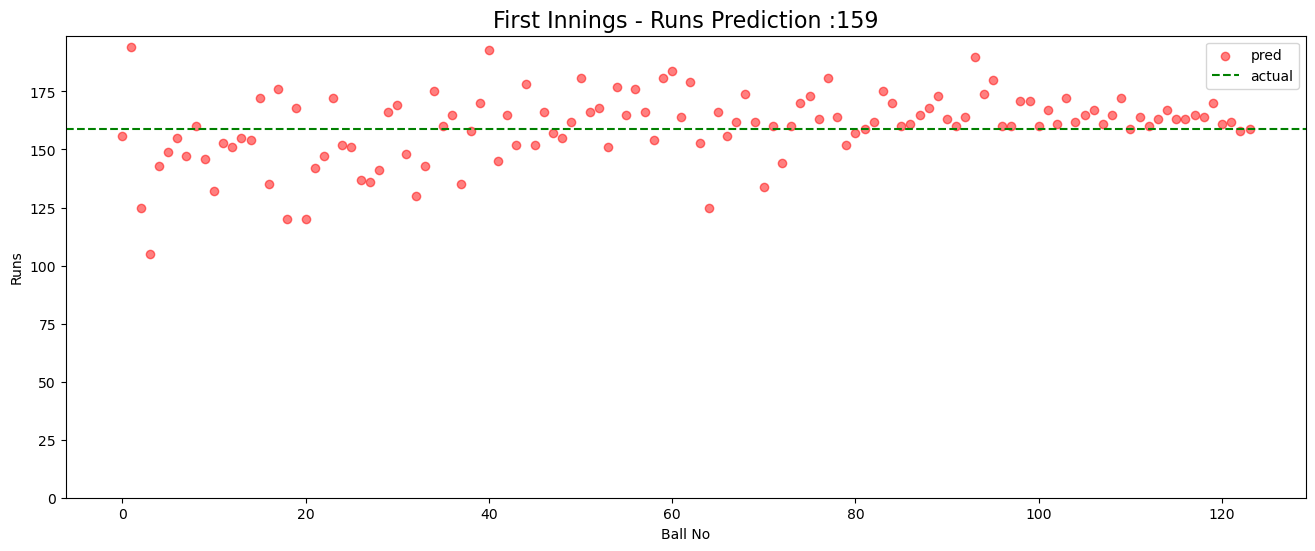

In [72]:
x_values = [i for i in range(len(df_ing1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16,6))
plt.scatter(x_values, y_values, color = 'r', alpha = 0.5, label = 'pred')
plt.axhline(actual_score, ls = '--', color = 'g', label = 'actual')
plt.ylim(0, actual_score + 40)
plt.title('First Innings - Runs Prediction :'+ str(actual_score), fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [73]:
error_ing1_ls = [abs(i - actual_score) for i in ing1_runs_pred]

In [74]:
np.mean(error_ing1_ls)

np.float64(10.951612903225806)

# Runs prediction : 2nd innings

In [75]:
# define target as ing 1 actual score
ing1_actual_score = actual_score
target = ing1_actual_score

curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball_no[i]
    curr_wickets += df_ing2.isOut[i]
    

    prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)    
#   print('target:', target)
#   print('score:', curr_score, 'overs:', 'curr_overs:', 'wickets:', 'curr_wickets:', 'prediction:', prediction)
    ing2_runs_pred.append(prediction)

In [76]:
ing2_actual_score = sum(df_ing2.total_runs)

In [78]:
# ing2_actual_score

# runs prediction chartv: 2nd innings

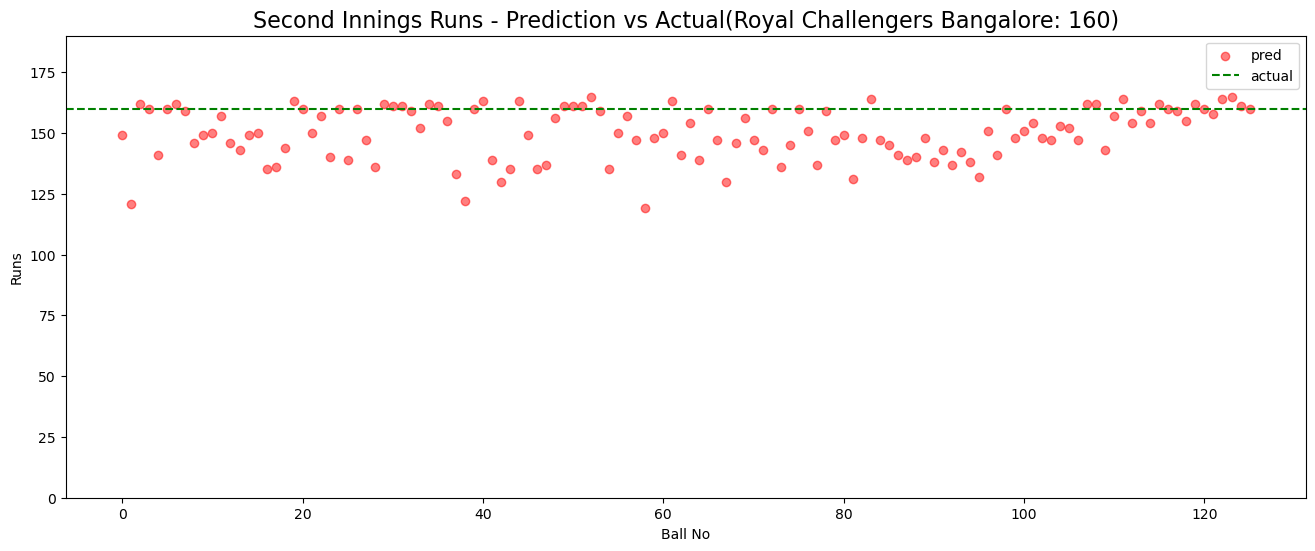

In [79]:
plt.figure(figsize = (16,6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.ylim(0, ing2_actual_score + 30)
plt.title('Second Innings Runs - Prediction vs Actual(' + t2 + ': '+ str(ing2_actual_score) + ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

# Error in 2nd innings runs:

In [80]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

np.float64(10.785714285714286)

# Win predictions : 1st innings

In [87]:
# initialize win/tie/lose - w.r.t chasing team
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):

    # 1st innings values
    ing1_curr_score = df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball_no[i]
    ing1_curr_wickets = df_ing1.isOut[i]
    
    # 2nd innings values
    ing2_curr_score = 0
    ing2_curr_overs = 0.0
    ing2_curr_wickets = 0

    # 100 iterations:(ex: 43% wins, 17%tie, 40% lose)
    for j in range(100):
        ing1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
        target = ing1_runs_prediction
        
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs,target)

        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0

In [88]:
# win_count_ls

In [89]:
tie_count

0

# Win predictions: 2nd innings

In [90]:
# 2nd innings values

ing2_curr_score = 0
ing2_curr_overs = 0.0
ing2_curr_wickets = 0

target = ing1_actual_score
# each ball
for i in range(len(df_ing2)):

    # 2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_overs += df_ing2.ball_no[i]
    ing2_curr_wickets += df_ing2.isOut[i]

    # 100 iterations:(ex: 43% wins, 17%tie, 40% lose)
    for j in range(100):
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs,target)

        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0


In [91]:
len(win_count_ls), len(tie_count_ls), len(lose_count_ls)

(250, 250, 250)

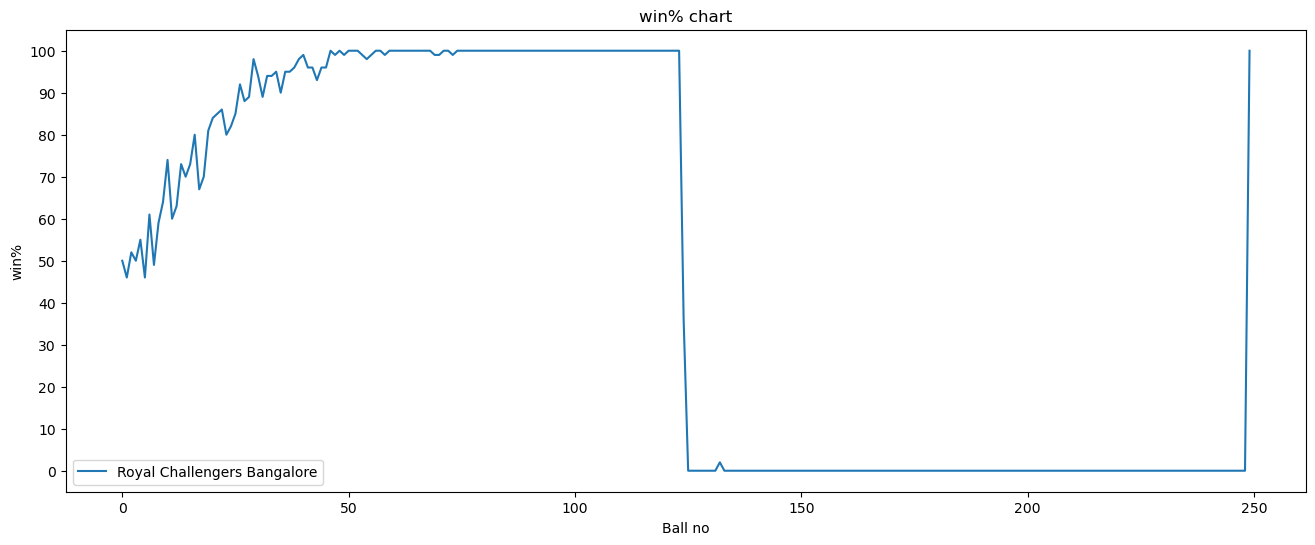

In [92]:
x_values = [i for i in range(len(win_count_ls))]
y_values = win_count_ls

plt.figure(figsize = (16,6))
plt.plot(x_values, y_values, label = t2)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('win% chart')
plt.xlabel('Ball no')
plt.ylabel('win%')
plt.legend()
plt.show()

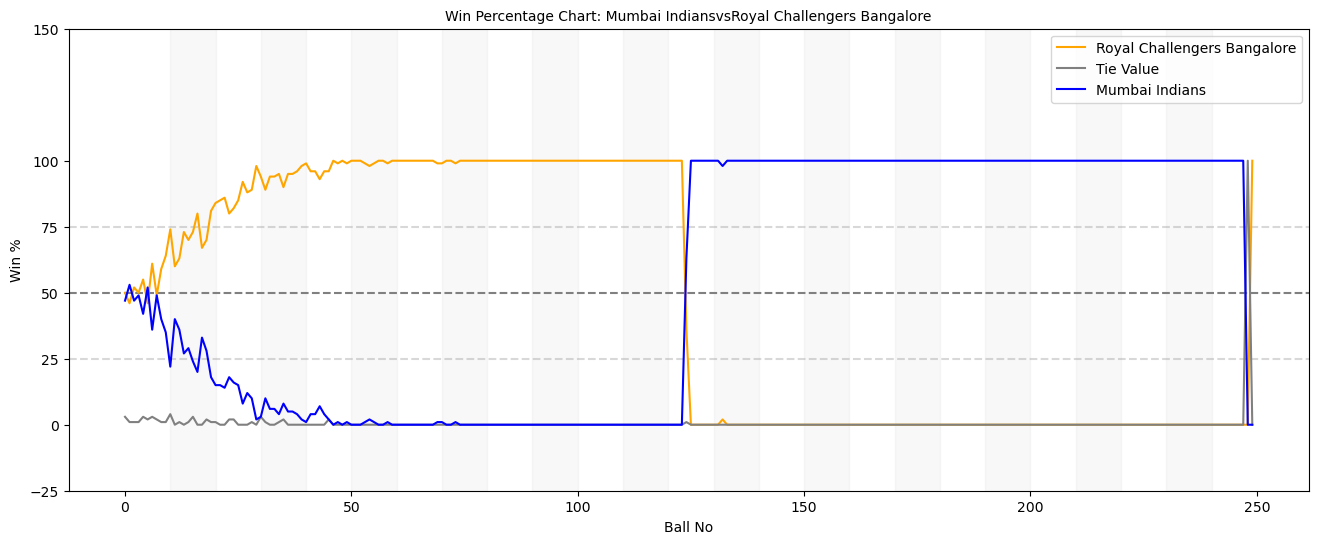

In [93]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color= 'grey')

plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)
plt.ylim(0, 100)
plt.yticks([-25, 0, 25, 50, 75, 100, 150])

# add confidence interval
#ci = 3
#plt.fill_between(x1_values, np.array(y1_values) ci, np.array(y1_values) + ct, color 31 
#plt.fill_between(x2_values, np.array(y2_values) ci, np.array(y2_values) + ct, color orange", alpha - 8.2) grey', alpha 8.2)
#plt.fill_between (x3_values, np.array(y3_values) ci, np.array(y3_values) + ci, color "blue", alpha - 8.2)

plt.title('Win Percentage Chart: '+ t1 + 'vs' + t2, fontsize = 10)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()